In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to split data 
from sklearn.model_selection import train_test_split

#function to train and test on the data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# to assessment the functions 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#to mapping categorical values
from sklearn.preprocessing import LabelEncoder
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [34]:
#Read data
df = pd.read_csv('data_of_sleep.csv')



Explore Data


In [3]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [4]:
df.tail(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
363,364,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
364,365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
365,366,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
366,367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
367,368,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [43]:
df.shape

(373, 14)

In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,187.000000,42.139410,7.129491,7.308311,59.128686,5.391421,70.171582,6816.353887
std,107.820066,8.640793,0.795139,1.195359,20.842589,1.772590,4.139704,1620.060932
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.000000,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,373.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB
None


In [7]:
#More information about Sleep Disorder Coulmn
SleepDisorderUnique = df['Sleep Disorder'].unique()
print(SleepDisorderUnique)

[nan 'Sleep Apnea' 'Insomnia']


In [8]:
#Missing Value: Replase nan values to (Unknown)
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Sleep Disorde')
print(df['Sleep Disorder'])

0      No Sleep Disorde
1      No Sleep Disorde
2      No Sleep Disorde
3           Sleep Apnea
4           Sleep Apnea
             ...       
368         Sleep Apnea
369         Sleep Apnea
370         Sleep Apnea
371         Sleep Apnea
372         Sleep Apnea
Name: Sleep Disorder, Length: 373, dtype: object


In [9]:
#Check the duplications 
df.duplicated().sum()


0

Analysis

In [10]:
#Label Encoding
GenderUnique = df['Gender'].unique()
print(GenderUnique)

['Male' 'Female']


In [11]:
# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Fit and transform the column
#df['Gender'] = label_encoder.fit_transform(df['Gender'])

#print(df)

In [12]:
OccupationUnique = df['Occupation'].unique()
print(OccupationUnique)

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [13]:
# to check if we have nulls
print(df.isnull().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [14]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [15]:

if 'Person ID' in df.columns:
    df = df.drop(columns=['Person ID'])
else:
    print("The column 'Person ID' is not found in the DataFrame.")

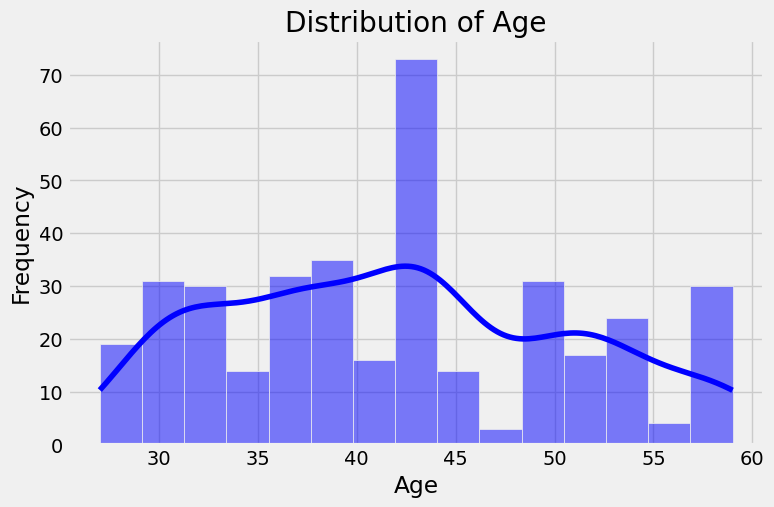

In [16]:


# Plot histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", kde=True, bins=15, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


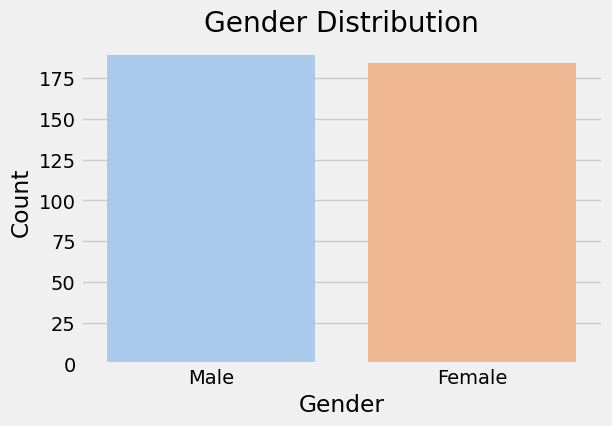

In [17]:
# Plot bar plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

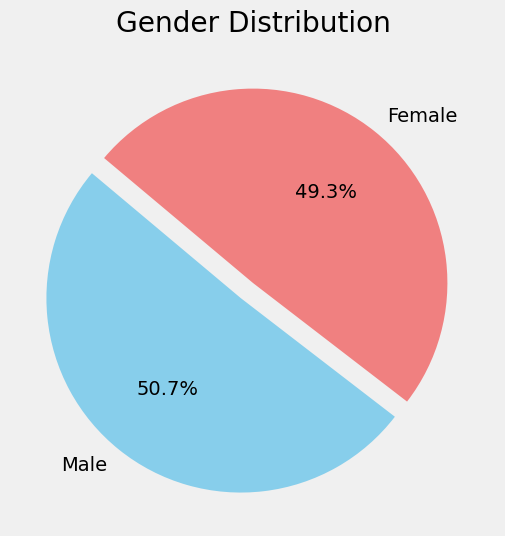

In [18]:
gender_counts = df['Gender'].value_counts()
total = gender_counts.sum()
percentages = {k: (v / total) * 100 for k, v in gender_counts.items()}

# Plotting a pie chart
labels = percentages.keys()
sizes = percentages.values()
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (e.g., Male)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("Gender Distribution")
plt.show()

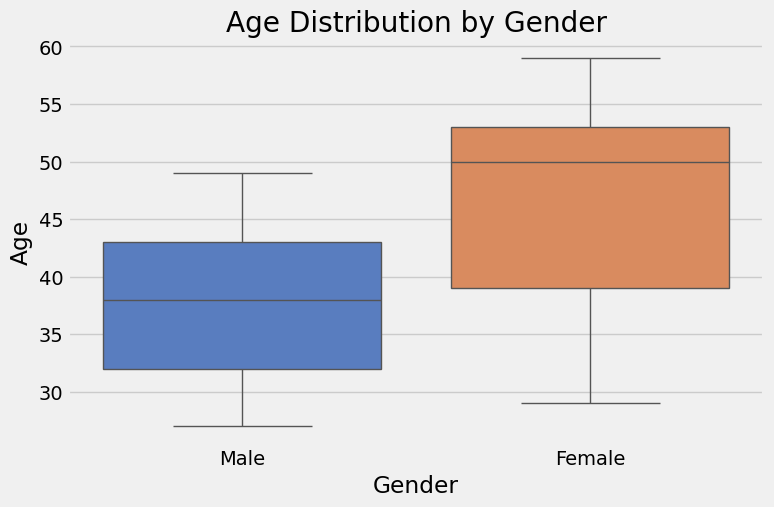

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Gender", y="Age", palette="muted")
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

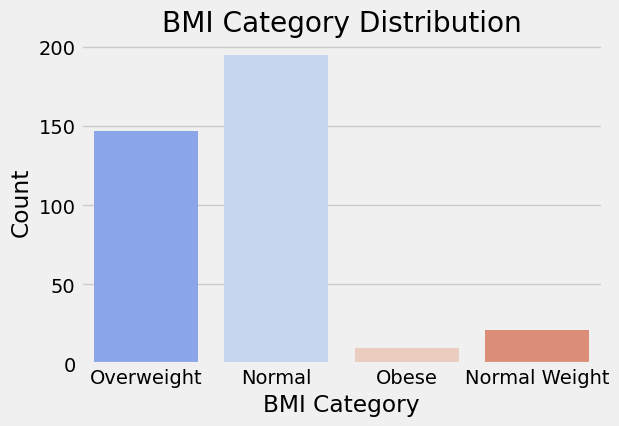

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="BMI Category", palette="coolwarm")
plt.title("BMI Category Distribution")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

Sleep Disorder
No Sleep Disorde    58.713137
Sleep Apnea         20.643432
Insomnia            20.643432
Name: proportion, dtype: float64


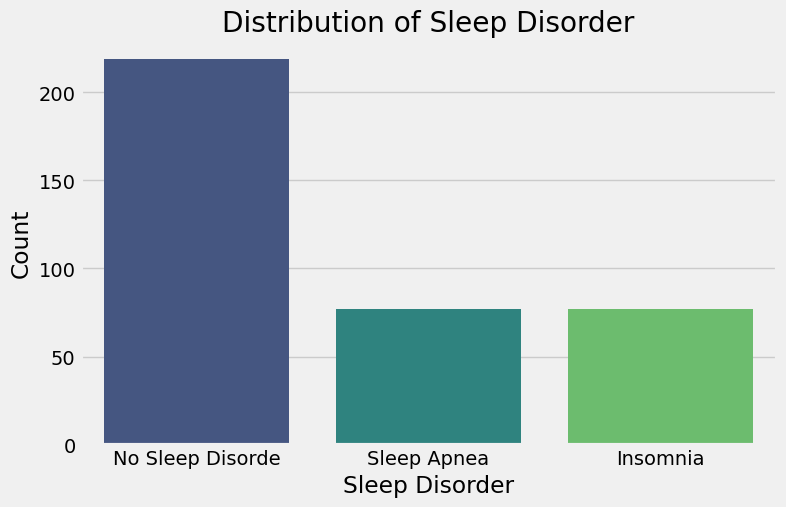

In [21]:
sleep_disorder_stats = df['Sleep Disorder'].value_counts(normalize=True) * 100
print(sleep_disorder_stats)

# Plotting the distribution of Sleep Disorder
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sleep Disorder', palette="viridis")
plt.title("Distribution of Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")
plt.show()

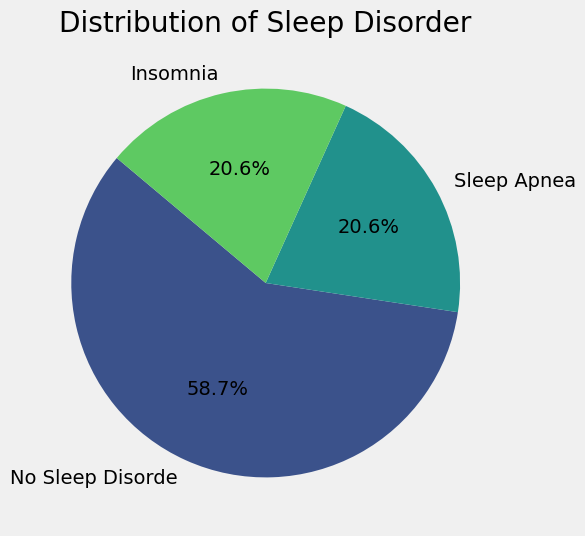

In [22]:
# Calculate the percentage distribution of Sleep Disorder
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
sleep_disorder_percentages = (sleep_disorder_counts / sleep_disorder_counts.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sleep_disorder_percentages, labels=sleep_disorder_percentages.index, 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(sleep_disorder_percentages)))
plt.title("Distribution of Sleep Disorder")
plt.show()


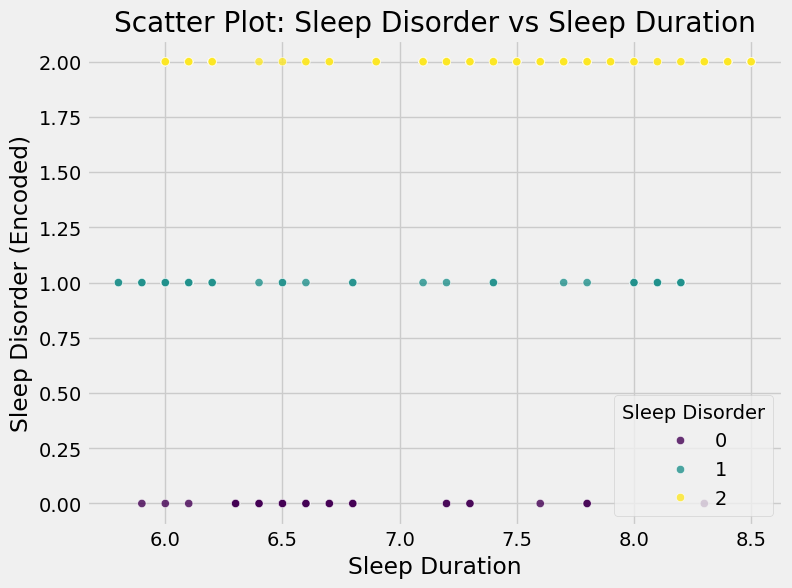

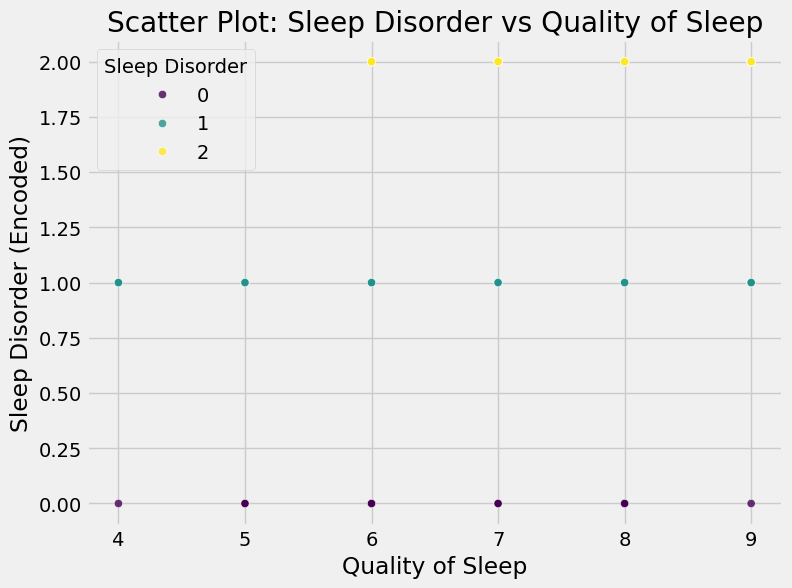

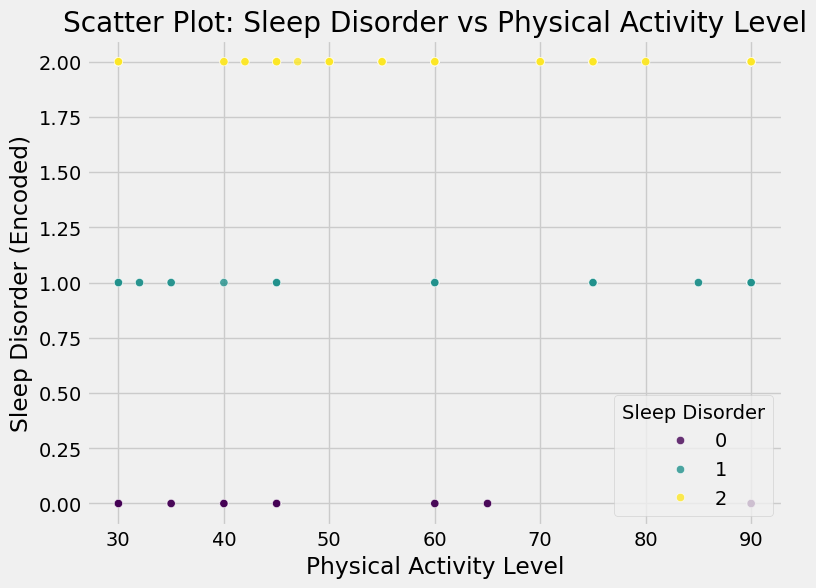

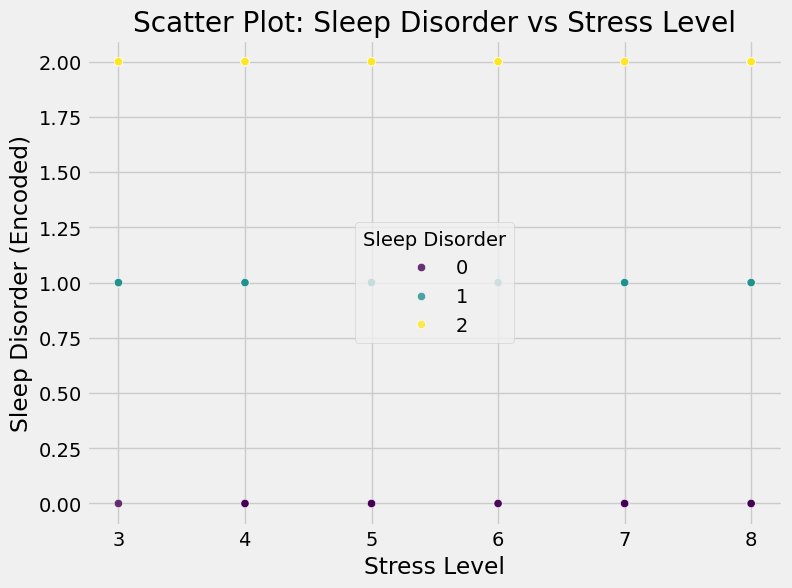

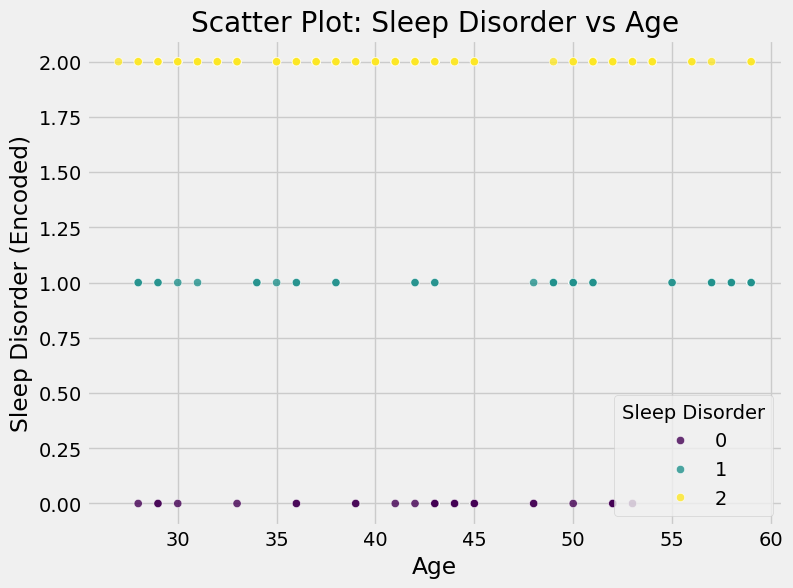

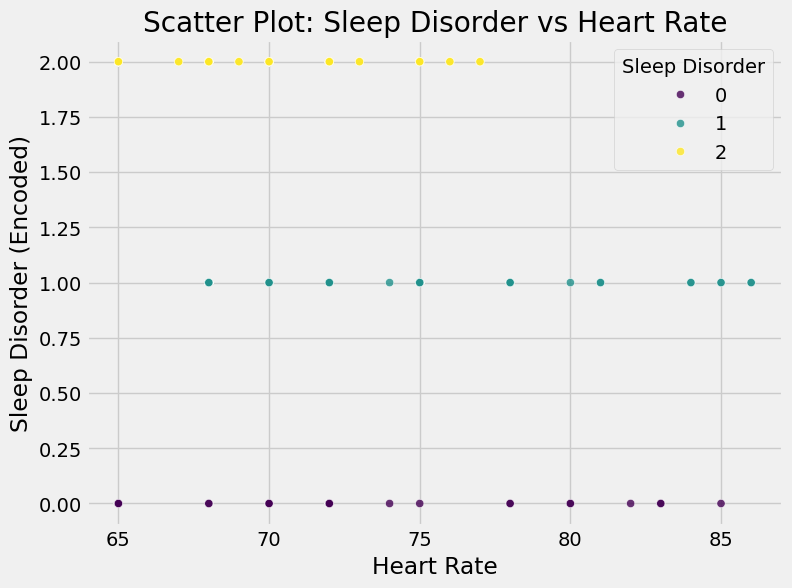

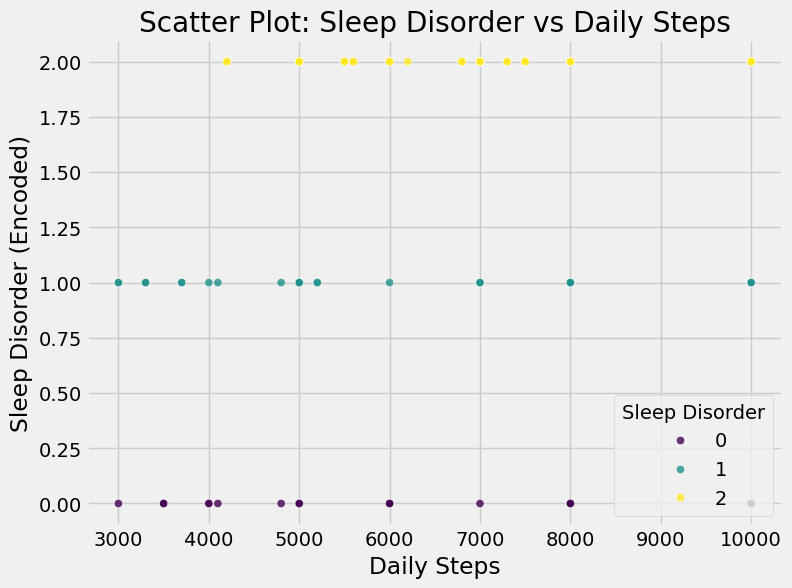

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sleep Disorder'] = encoder.fit_transform(df['Sleep Disorder'])

independent_variables = [
    'Sleep Duration', 
    'Quality of Sleep', 
    'Physical Activity Level', 
    'Stress Level', 
    'Age', 
    'Heart Rate', 
    'Daily Steps'
]


for variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x=variable,
        y='Sleep Disorder',
        hue='Sleep Disorder',  
        palette='viridis',
        alpha=0.8
    )
    plt.title(f"Scatter Plot: Sleep Disorder vs {variable}")
    plt.xlabel(variable)
    plt.ylabel("Sleep Disorder (Encoded)")
    plt.legend(title='Sleep Disorder')
    plt.show()




In [37]:
print(df['Sleep Disorder'].unique())

[2 1 0]


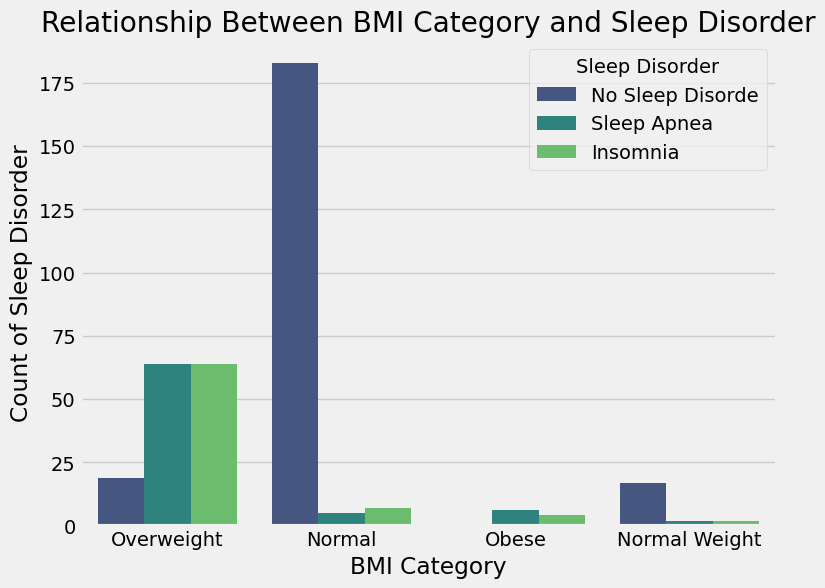

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette="viridis")
plt.title('Relationship Between BMI Category and Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Count of Sleep Disorder')
plt.show()


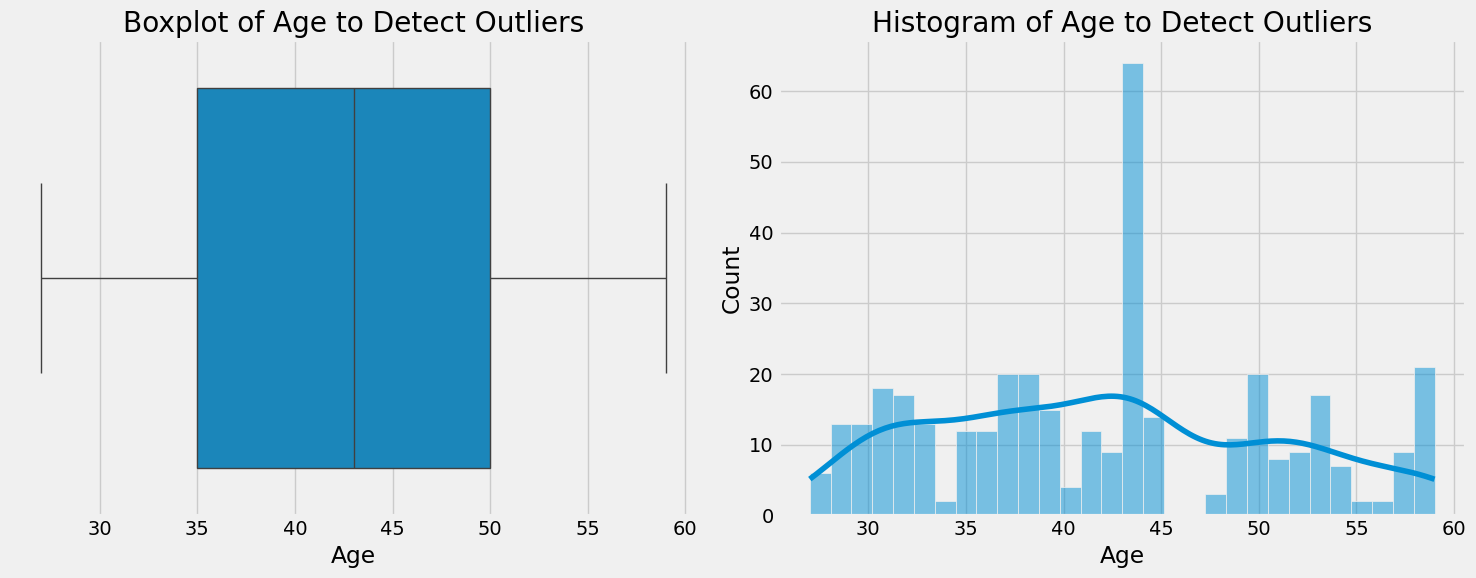

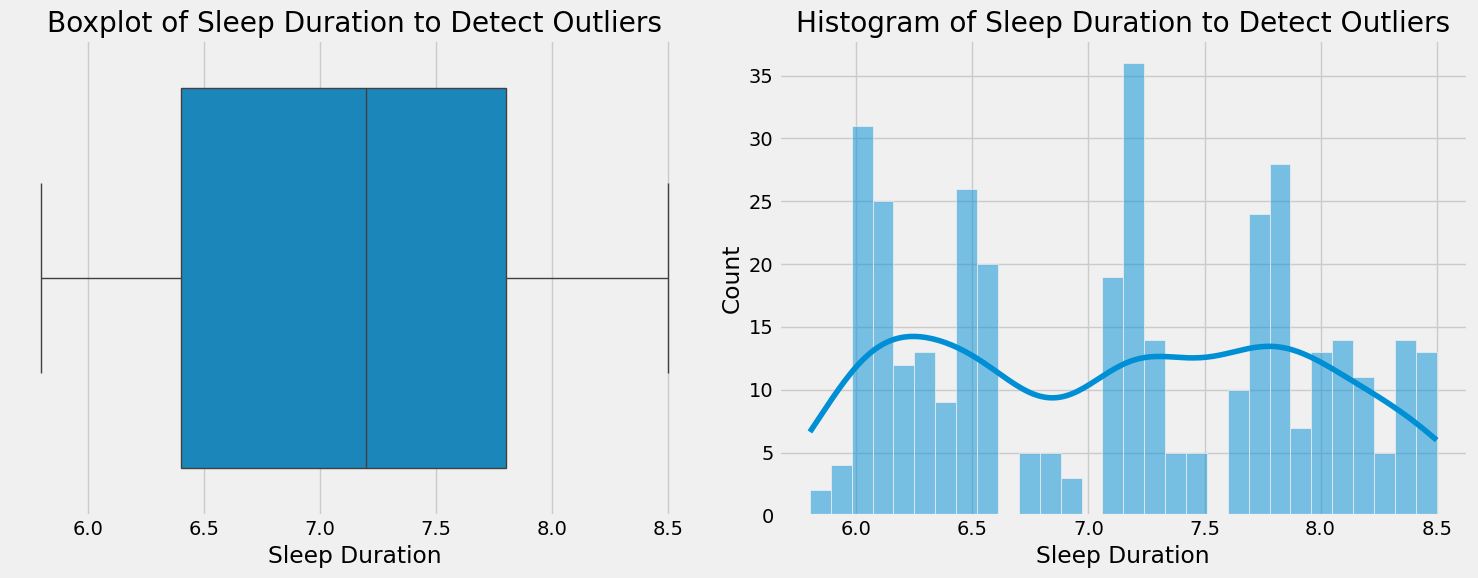

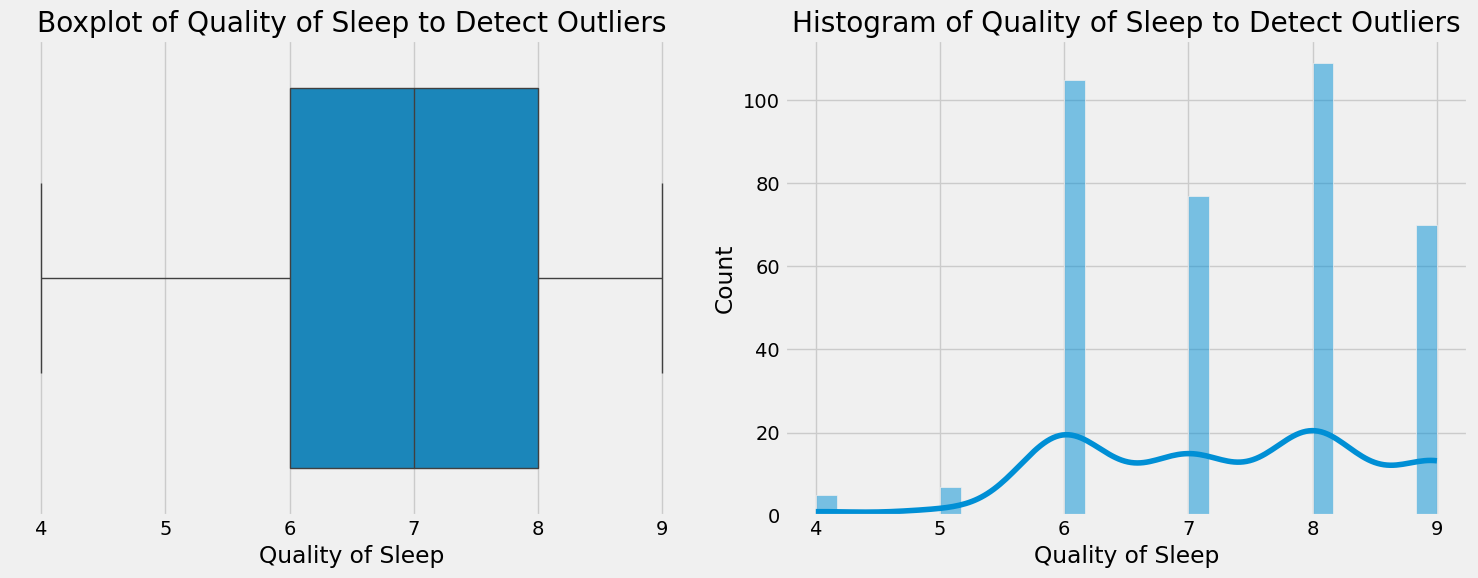

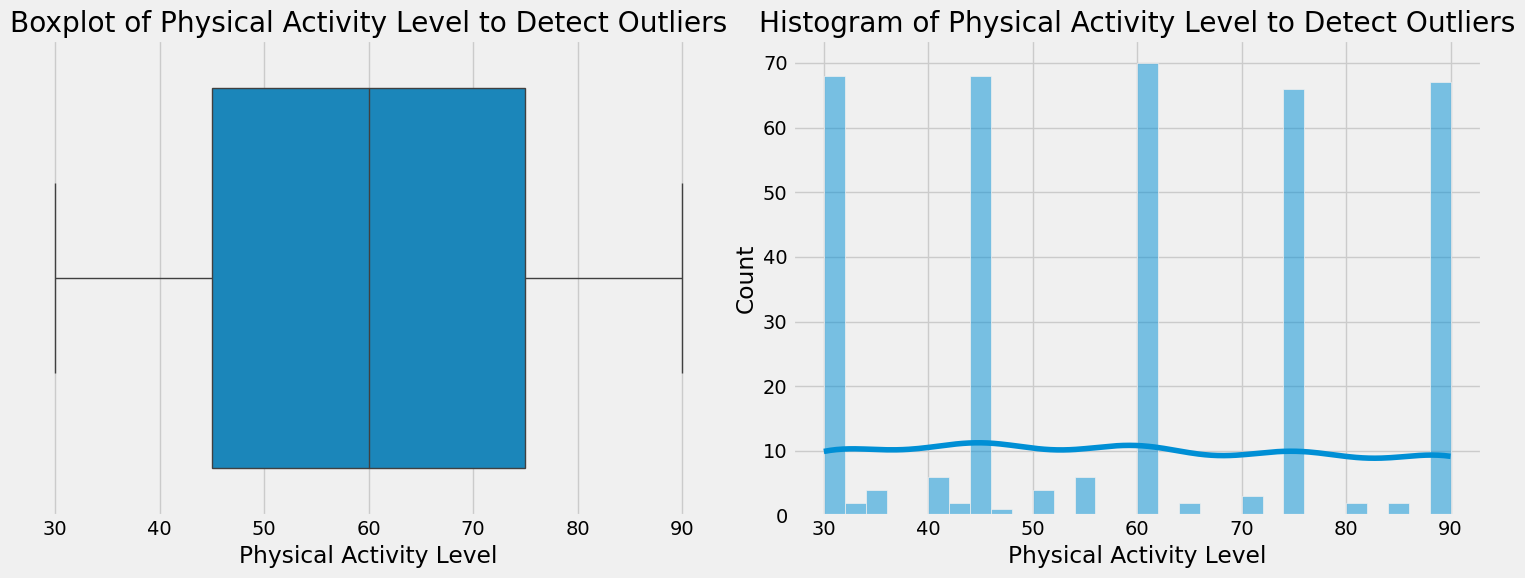

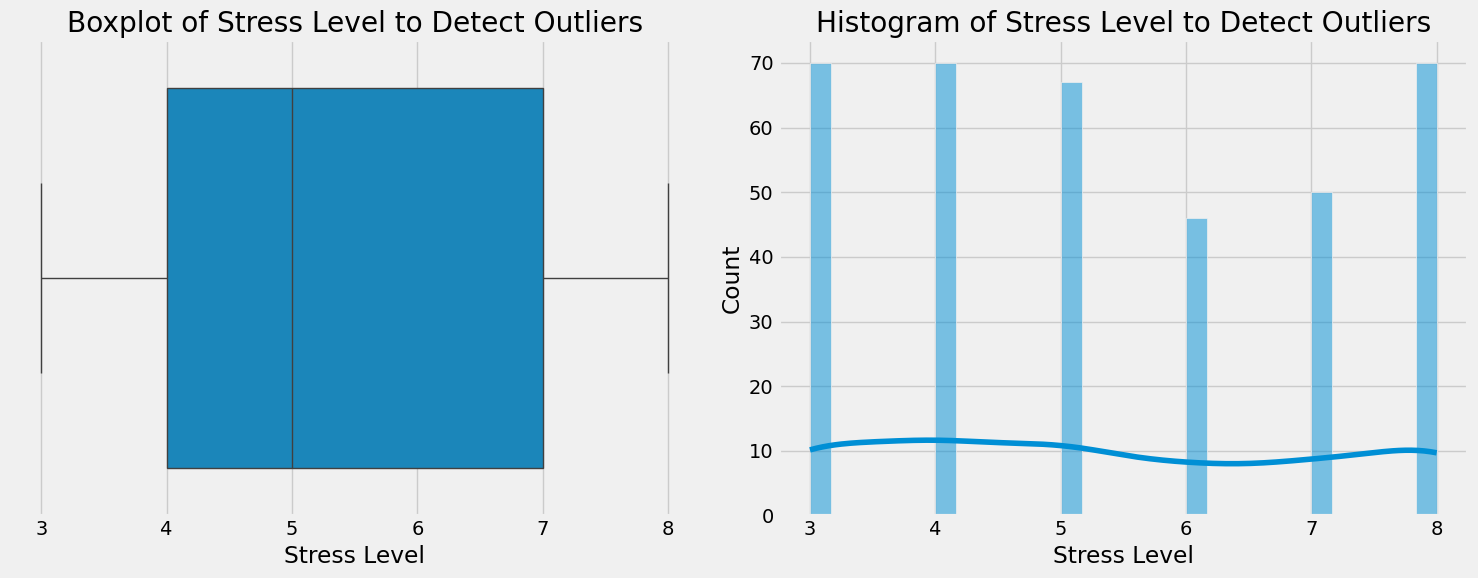

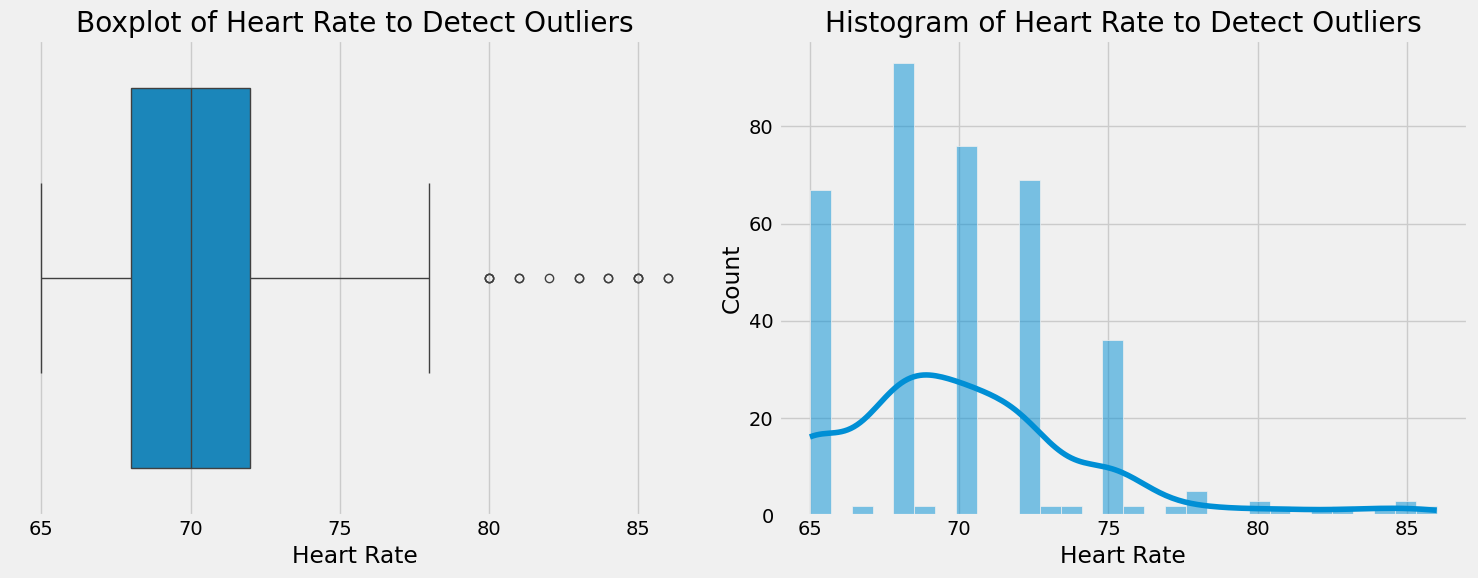

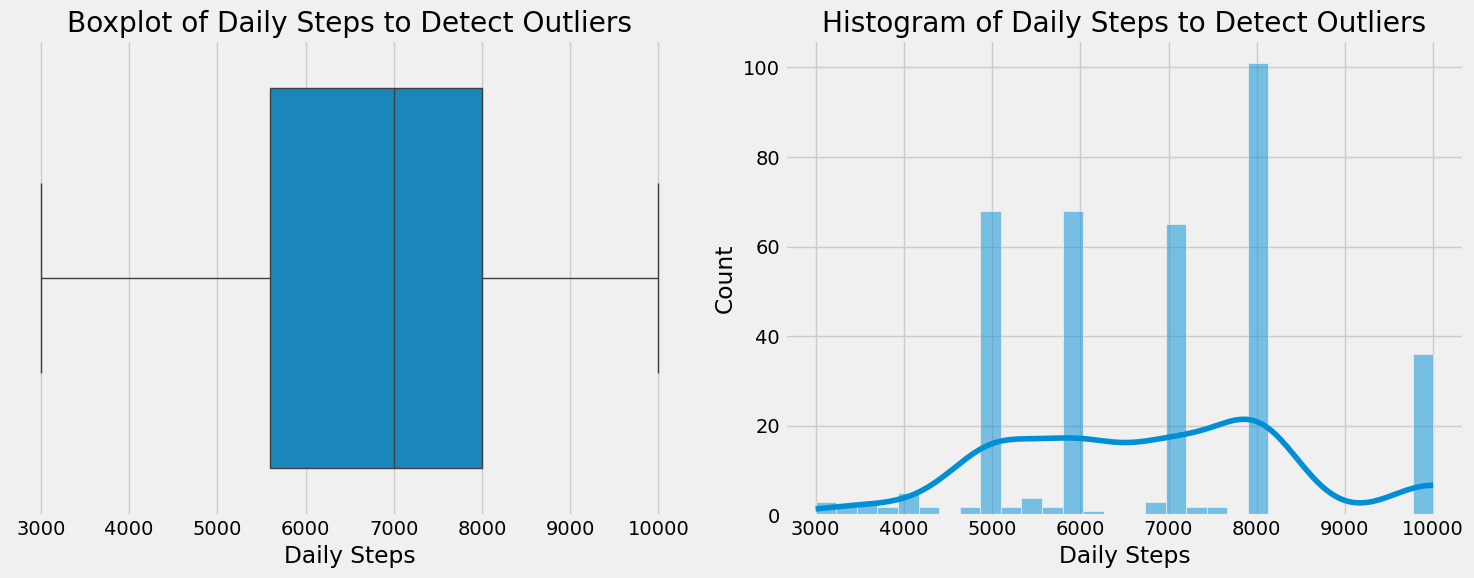

In [25]:
# loop to find outlier

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f'Boxplot of {column} to Detect Outliers')

    # Histogram
    sns.histplot(df[column], kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Histogram of {column} to Detect Outliers')

    plt.tight_layout()
    plt.show()

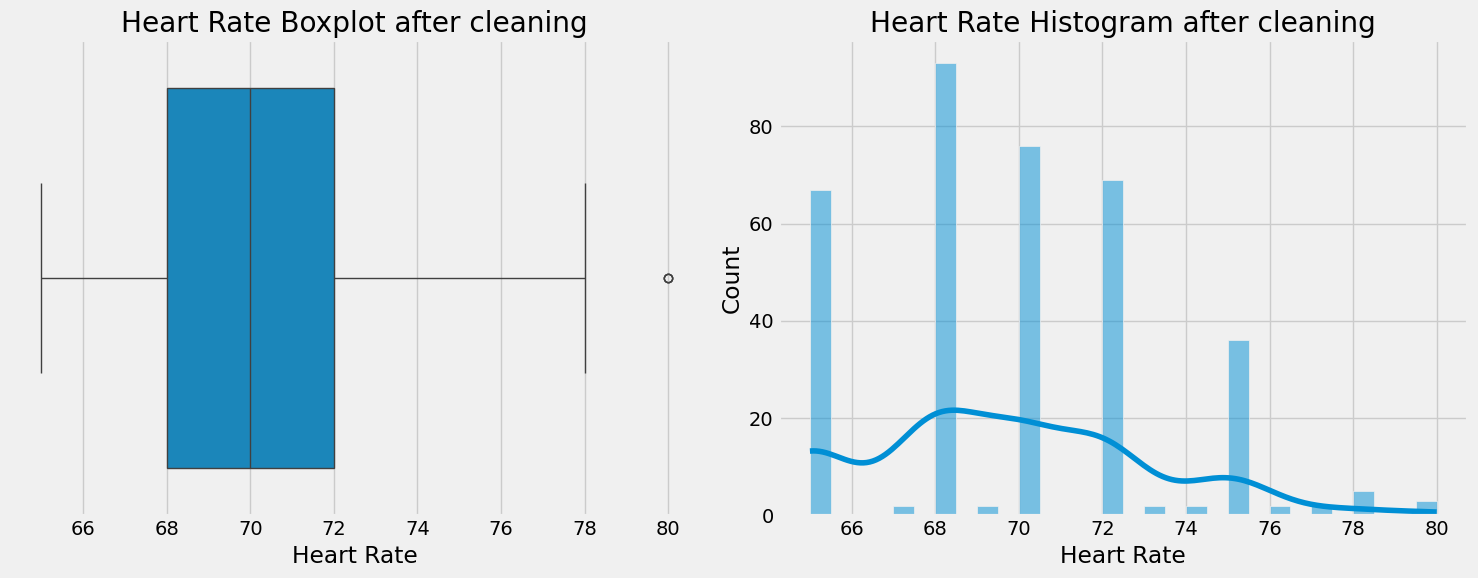

In [26]:
# to clean Heart Rate 
df['Heart Rate'] = pd.to_numeric(df['Heart Rate'], errors='coerce')

df_cleaned = df[df['Heart Rate'] <= 80]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot after cleaning
sns.boxplot(x=df_cleaned['Heart Rate'], ax=axes[0])
axes[0].set_title('Heart Rate Boxplot after cleaning')

# Histogram after cleaning
sns.histplot(df_cleaned['Heart Rate'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Heart Rate Histogram after cleaning')


plt.tight_layout()
plt.show()

In [27]:
# to find outliers 
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Heart Rate'] < lower_bound) | (df['Heart Rate'] > upper_bound)]


print(outliers.count)

<bound method DataFrame.count of      Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
5      Male   28     Software Engineer             5.9                 4   
6      Male   29               Teacher             6.3                 6   
16   Female   29                 Nurse             6.5                 5   
18   Female   29                 Nurse             6.5                 5   
80   Female   34             Scientist             5.8                 4   
81   Female   34             Scientist             5.8                 4   
93     Male   35                Lawyer             7.4                 7   
145  Female   38                Lawyer             7.4                 7   
147    Male   39              Engineer             6.5                 5   
264    Male   48                Doctor             7.3 

In [28]:
# to select numric values
df_num = df.select_dtypes(include=[float, int]) 
df_num.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.340770,0.470019,0.176060,-0.418471,-0.224094,0.057677
Sleep Duration,0.340770,1.000000,0.882717,0.210458,-0.810207,-0.515960,-0.039983
Quality of Sleep,0.470019,0.882717,1.000000,0.190675,-0.898239,-0.659888,0.016407
Physical Activity Level,0.176060,0.210458,0.190675,1.000000,-0.031490,0.138199,0.773105
Stress Level,-0.418471,-0.810207,-0.898239,-0.031490,1.000000,0.670010,0.187697
Heart Rate,-0.224094,-0.515960,-0.659888,0.138199,0.670010,1.000000,-0.030161
Daily Steps,0.057677,-0.039983,0.016407,0.773105,0.187697,-0.030161,1.000000


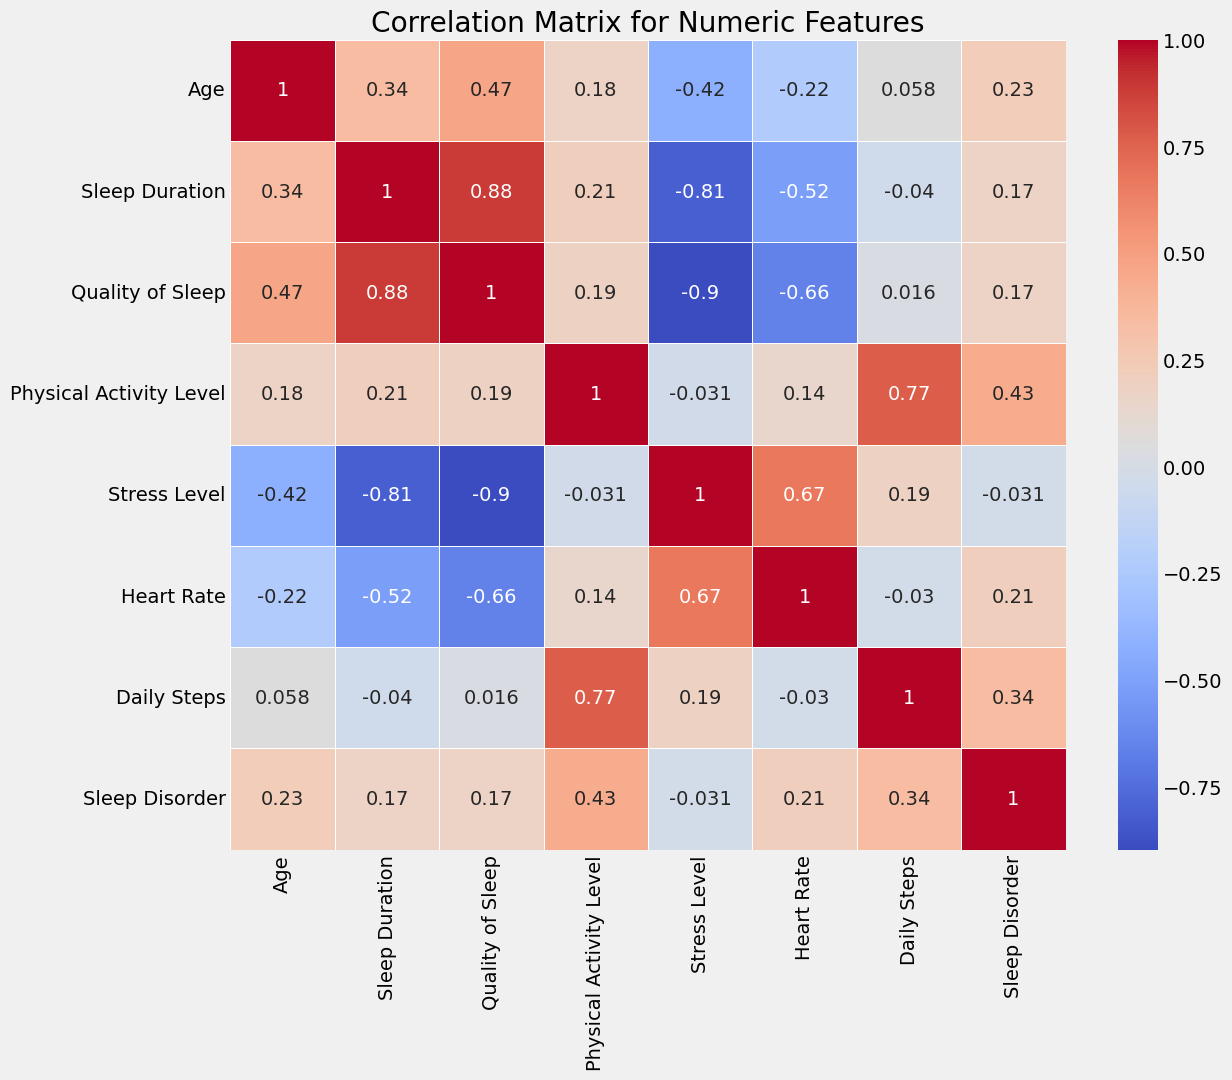

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
df['Sleep Disorder'] = encoder.fit_transform(df['Sleep Disorder'])
# Drop 'Gender' column

df_dropGender = df.drop(columns=['Gender'])

# select the numric data
df_numeric = df_dropGender.select_dtypes(include=['number'])

# corrlation
correlation_matrix = df_numeric.corr()
# drew corrlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()



create Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import pandas as pd

# Convert categorical columns (such as Occupation) to One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], drop_first=True)

# Now we can proceed with the code as usual
X = df.drop('Sleep Disorder', axis=1)  # Remove the target variable
y = df['Sleep Disorder']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train the models and evaluate their performance
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions using the model
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')  # 'macro' calculates the average recall across classes
    fscore = f1_score(y_test, y_pred, average='macro')  # 'macro' calculates the average F-Score across classes
    
    # Add the results to the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'F-Score': fscore
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy    Recall   F-Score
0        Random Forest  0.866071  0.815523  0.825543
1    Gradient Boosting  0.866071  0.815523  0.825543
2  Logistic Regression  0.901786  0.873330  0.883598


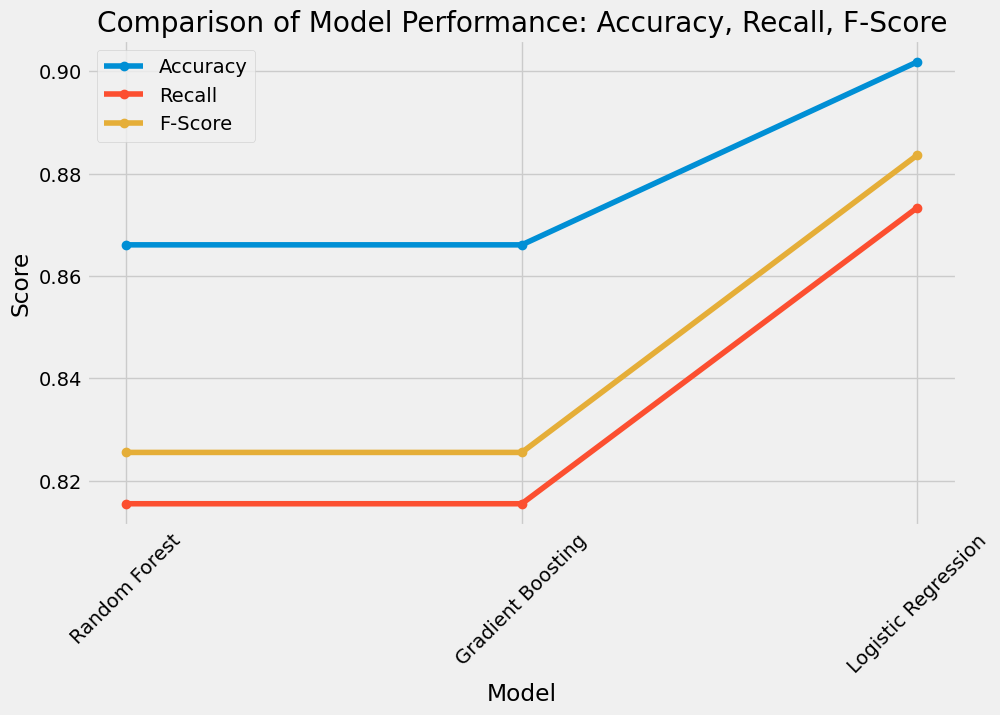

In [32]:
import matplotlib.pyplot as plt

# Plot the metrics: Accuracy, Recall, F-Score
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy, Recall, and F-Score
plt.plot(results_df['Model'], results_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_df['Model'], results_df['Recall'], label='Recall', marker='o')
plt.plot(results_df['Model'], results_df['F-Score'], label='F-Score', marker='o')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance: Accuracy, Recall, F-Score')
plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlap
plt.legend()

# Show plot
plt.show()
